# DrugClassification Projekt

1. **Datensatz einlesen**
   - Anzeigen der ersten und letzten 5 Zeilen

2. **Bereinigung der Daten**

3. **Explorative Datenanalyse (EDA)**
   - 3.1 Grundlegende statistische Informationen für numerische Features
   - 3.2 Kreuztabellen für kategoriale Features und Zielvariable
   - 3.3 Boxplots - Numerische Features in Bezug auf die Zielvariable
   - 3.4 Korrelationsmatrix und Heatmap mit allen Features durch Dummy-Variablen

4. **Train-Test-Split**

5. **Entscheidungsbaum**
   - 5.1 Auswahl des Baums
   - 5.2 Cross-Validation
   - 5.3 Lernkurve
   - 5.4 Test und Bewertung
   - 5.5 Optimierter Baum mit GridSearchCV
   - 5.6 Cross-Validation
   - 5.7 Lernkurve
   - 5.8 Test und Bewertung


6. **Logistische Regression (Log-Reg)**
   - 6.1 Mit Hyperparameter-Optimierung mit GridSearchCV
   - 6.2 Cross-Validation
   - 6.3 Lernkurve
   - 6.4 Test und Bewertung


7. **Support Vector Classifier (SVC)**
   - 7.1 Einfacher SVC
   - 7.2 Cross-Validation
   - 7.3 Lernkurve
   - 7.4 Test und Bewertung
   - 7.5 Optimierter SVC
   - 7.6 Cross-Validation
   - 7.7 Lernkurve
   - 7.8 Test und Bewertung

8. **Kritische Auseinandersetzung mit den Ergebnissen**


In [1]:
import os
print(os.getcwd())


C:\Users\mbaeu


In [35]:
!pip install pandas numpy seaborn matplotlib scikit-learn

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
!pip install kaggle

In [38]:
!pip install --upgrade kaggle

     ---------------------------------------- 0.0/84.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/84.5 kB ? eta -:--:--
     ------------- ------------------------ 30.7/84.5 kB 262.6 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/84.5 kB 465.5 kB/s eta 0:00:01
     -------------------------------------- 84.5/84.5 kB 594.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111929 sha256=b60e0e850a4c4c743bc539376b9bcaf37e4827a052f3b6b62795093683dae2e0
  Stored in directory: c:\users\mbaeu\appdata\local\pip\cache\wheels\6d\46\5f\f593df05fd21700f3abc3756b3258a2ab3d5e70502ef9e6cb0
Succe

In [39]:
import os
os.environ['KAGGLE_USERNAME'] = "michaelbumler"
os.environ['KAGGLE_KEY'] = "8ddd25db097657d352645314cfa3f2b8"

# 1. Einlesen des Datensatzes und erste Schritte


Nachdem die erforderlichen Bibliotheken importiert wurden, wird der Datensatz 'drug200.csv' in ein Pandas DataFrame geladen. Ein DataFrame ist eine zweidimensionale, größenveränderliche, potenziell heterogene Tabelle, die eine der grundlegendsten Datenstrukturen in Pandas darstellt. In diesem Fall repräsentiert das DataFrame `df` unseren Datensatz, der für die Analyse und das maschinelle Lernen verwendet wird.


In [40]:
import pandas as pd
from IPython.display import display, HTML

# Einlesen der CSV-Datei 'drug200.csv' in ein Pandas DataFrame 'df'
df = pd.read_csv('drug200.csv')

# Anzeigen der Größe des DataFrames
print(f"Größe des DataFrames: {df.shape[0]} Zeilen und {df.shape[1]} Spalten\n")

# Funktion zum Erstellen einer HTML-Tabelle
def create_html_table(dataframe, title):
    table_html = dataframe.to_html()
    return f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'><b>{title}</b>{table_html}</div>"

# Erstellen von HTML-Tabellen für die ersten und letzten fünf Zeilen des DataFrames
html_head = create_html_table(df.head(), "Die ersten fünf Zeilen des DataFrames:")
html_tail = create_html_table(df.tail(), "Die letzten fünf Zeilen des DataFrames:")

# Anzeigen der Tabellen nebeneinander
display(HTML(html_head + html_tail))


Größe des DataFrames: 200 Zeilen und 6 Spalten



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# 2. Überprüfung und Bereinigung der Daten

Überprüfen des DataFrames auf fehlende Werte. 
Fehlende Werte können die Qualität der Analyse beeinträchtigen und sollten identifiziert werden.

In [41]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Entfernen von Duplikaten, um die Datenqualität zu verbessern.
Duplikate können die Analyseergebnisse verzerren und sollten entfernt werden.

In [130]:
df = df.drop_duplicates()

# 3. Explorative Datenanalyse (EDA) 

Teil der EDA ist es, die Verteilung der verschiedenen Merkmale im Datensatz zu visualisieren. Diese Visualisierungen helfen uns, die Datenstruktur besser zu verstehen und bieten Einsichten, die für die weitere Analyse und Modellierung wichtig sind.


<Figure size 1500x600 with 0 Axes>

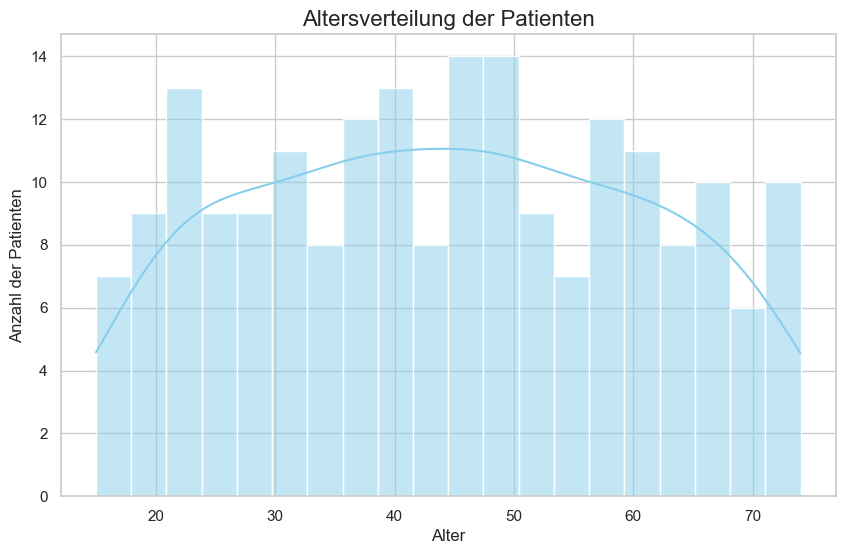

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


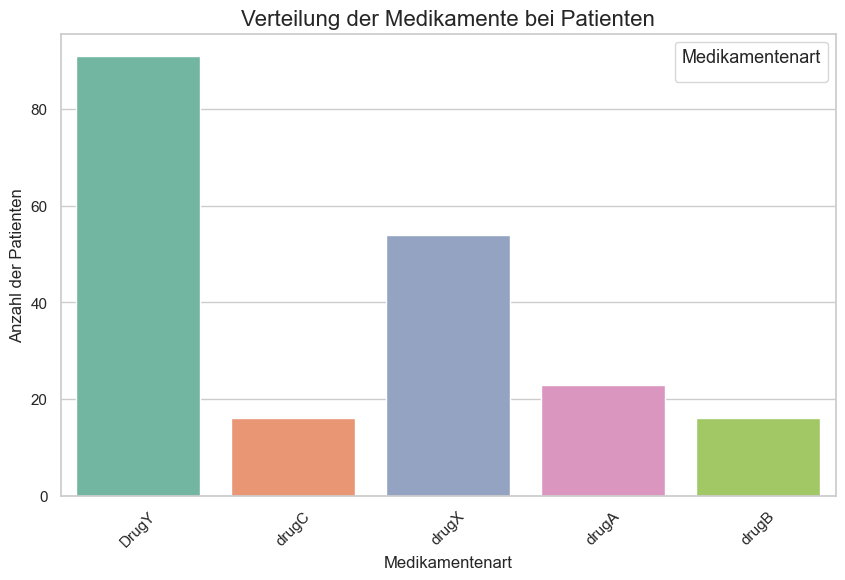

<Figure size 640x480 with 0 Axes>

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Funktion zum Erstellen einer HTML-Tabelle für Häufigkeitsverteilungen

def create_html_counts(column_name, title):
    counts = df[column_name].value_counts().reset_index()
    counts.columns = [column_name, 'Count']
    table_html = counts.to_html(index=False)
    return f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'><b>{title}</b>{table_html}</div>"

# Erstellen von HTML-Tabellen für die Häufigkeitsverteilungen und statistische Informationen
html_stats = f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'><b>Grundlegende statistische<br>Informationen für numerische Merkmale:</b>{df.describe().to_html()}</div>"
html_sex = create_html_counts('Sex', 'Geschlechterverteilung')
html_bp = create_html_counts('BP', 'Blutdruckverteilung')
html_cholesterol = create_html_counts('Cholesterol', 'Cholesterinverteilung')
html_drug = create_html_counts('Drug', 'Medikamentenverteilung')

# Anzeigen aller Tabellen nebeneinander
display(HTML(html_stats + html_sex + html_bp + html_cholesterol + html_drug))

# Einstellen der Größe des gesamten Plots
plt.figure(figsize=(15, 6))

# Erstellen des Plots für die Altersverteilung
plt.figure(figsize=(10, 6))  # Größe des Plots anpassen
sns.histplot(df['Age'], kde=True, bins=20, color="skyblue")  # Anzahl der Bins und Farbe anpassen
plt.title('Altersverteilung der Patienten', fontsize=16)  # Titel und Schriftgröße anpassen
plt.xlabel('Alter', fontsize=12)  # Achsenbeschriftung für X-Achse
plt.ylabel('Anzahl der Patienten', fontsize=12)  # Achsenbeschriftung für Y-Achse
plt.show()

# Stil und Farbschema einstellen
sns.set(style="whitegrid")

# Erstellen des Plots für die Verteilung der Medikamente
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', data=df, hue='Drug', dodge=False, palette="Set2")
plt.title('Verteilung der Medikamente bei Patienten', fontsize=16)
plt.xlabel('Medikamentenart', fontsize=12)
plt.ylabel('Anzahl der Patienten', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Medikamentenart', title_fontsize='13', loc='upper right', fontsize='12')  # Legende anpassen
plt.show()


# Anzeigen der Plots
plt.tight_layout()  # Passt die Plots an, um Überlappungen zu vermeiden
plt.show()



In diesem Abschnitt führen wir eine Erstellung von Kreuztabellen für kategoriale Variablen durch. 

In [123]:
from IPython.display import display, HTML

# Funktion zum Erstellen der HTML-Tabelle
def create_html_table(column1, column2, title):
    crosstab_html = pd.crosstab(df[column1], df[column2]).to_html()
    return f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'><b>{title}</b>{crosstab_html}</div>"

# Erstellen von HTML-Tabellen für die Kreuztabellen
html_sex = create_html_table('Drug', 'Sex', 'Kreuztabelle: Drug vs. Sex')
html_bp = create_html_table('Drug', 'BP', 'Kreuztabelle: Drug vs. BP')
html_cholesterol = create_html_table('Drug', 'Cholesterol', 'Kreuztabelle: Drug vs. Cholesterol')

# Anzeigen der Tabellen nebeneinander
display(HTML(html_sex + html_bp + html_cholesterol))



## Durchschnittswerte und Boxplots

Nun analysieren wir die Durchschnittswerte für das Alter und das Na_to_K-Verhältnis bezogen auf die verschiedenen Medikamente mit Boxplots, um die Verteilungen dieser Variablen zu visualisieren.


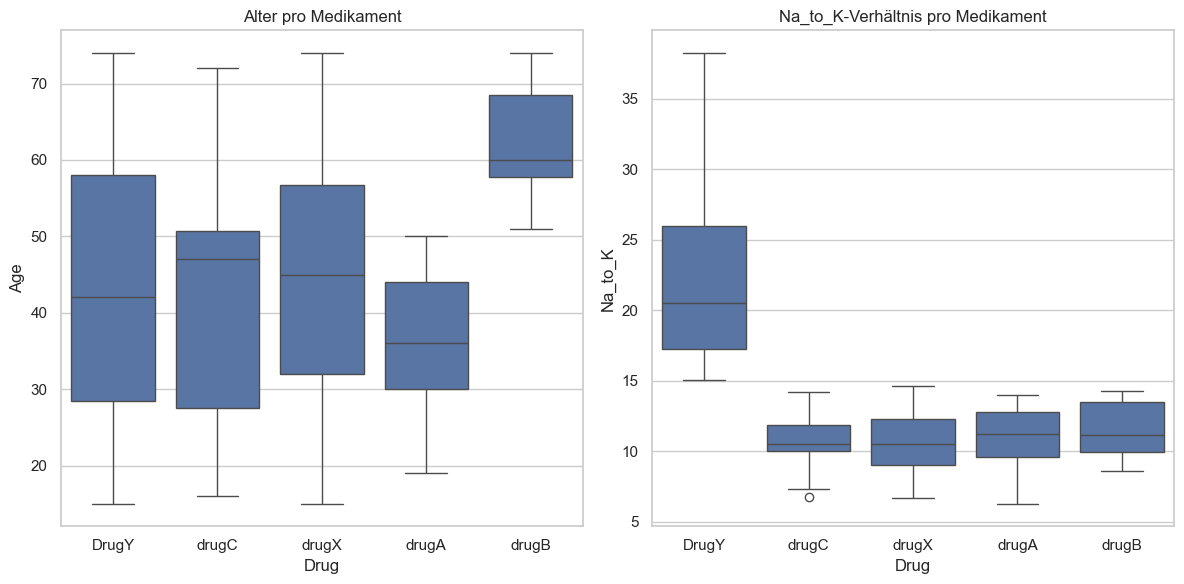

In [127]:
from IPython.display import display, HTML

# Funktion zum Erstellen einer HTML-Tabelle für Durchschnittswerte
def create_html_table(dataframe, title):
    table_html = dataframe.to_html()
    return f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'><b>{title}</b>{table_html}</div>"



# Boxplots nebeneinander
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Drug', y='Age', data=df)
plt.title('Alter pro Medikament')

plt.subplot(1, 2, 2)
sns.boxplot(x='Drug', y='Na_to_K', data=df)
plt.title('Na_to_K-Verhältnis pro Medikament')
plt.tight_layout()
plt.show()


.


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25,1,0,1,0,0,1,0,1,0,0,0,0
1,47,13,0,1,0,1,0,1,0,0,0,0,1,0
2,47,10,0,1,0,1,0,1,0,0,0,0,1,0
3,28,7,1,0,0,0,1,1,0,0,0,0,0,1
4,61,18,1,0,0,1,0,1,0,1,0,0,0,0


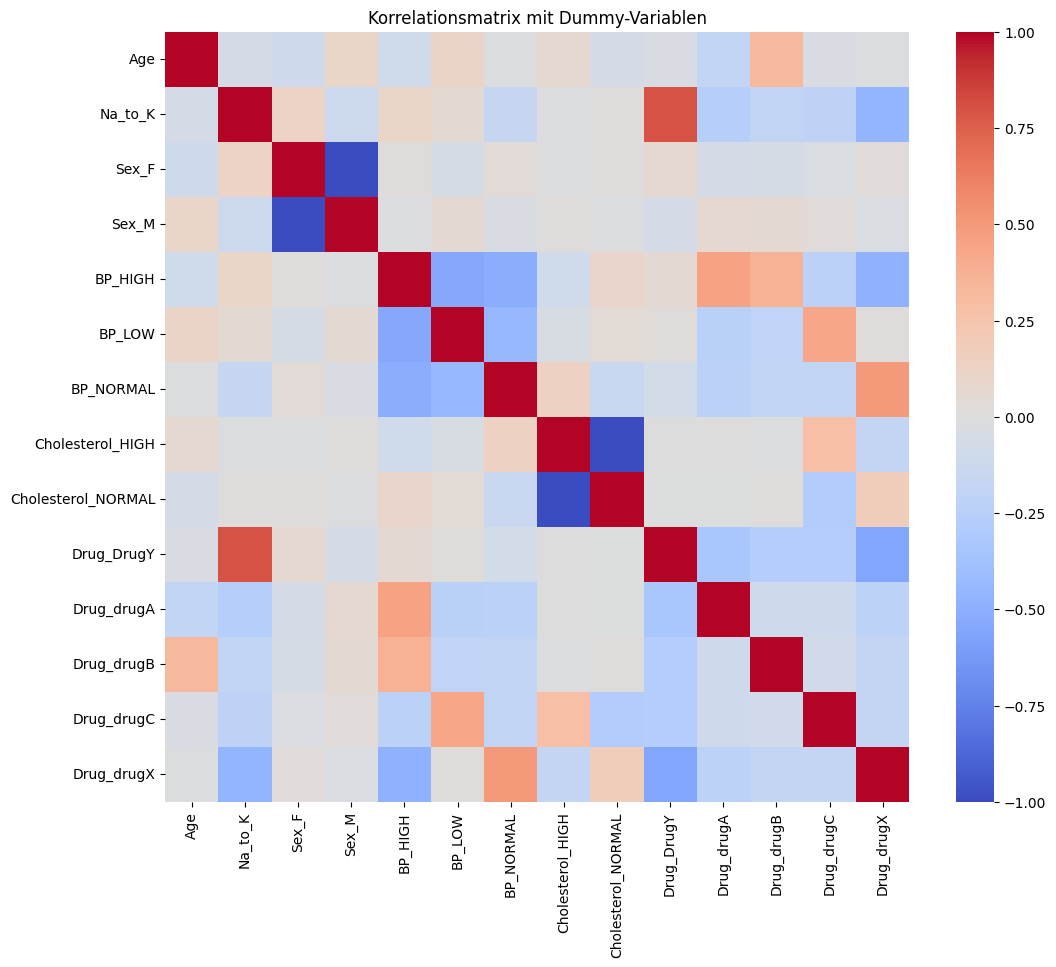

In [48]:
from IPython.display import display, HTML
import pandas as pd

# Kodierung der kategorialen Variablen ('Sex', 'BP', 'Cholesterol', 'Drug') in binäre Dummy-Variablen
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol', 'Drug']).astype(int)

# Erstellen der HTML-Tabelle für die ersten Zeilen des kodierten DataFrames
html_encoded_df = df_encoded.head().to_html()

# Anzeigen der Tabelle mit einer Überschrift
display(HTML(f"<b>Die ersten Zeilen des kodierten DataFrames:</b><br>{html_encoded_df}"))


# Berechnung und Visualisierung der Korrelationsmatrix für den kodierten DataFrame
corr_matrix_encoded = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_encoded, annot=False, cmap='coolwarm')
plt.title('Korrelationsmatrix mit Dummy-Variablen')
plt.show()



on**:
   In unserer Analyse haben wir die kategorialen Variablen 'Sex', 'BP', 'Cholesterol' und 'Drug' in binäre Dummy-Variablen umgewandelt, um sie für maschinelles Lernen vorzubereiten. Diese Transformation ermöglicht es uns, lineare Beziehungen zwischen diesen kategorialen Variablen und anderen Merkmalen im Datensatz zu untechen.

   Zur Visualisierung dieser Beziehungen haben wir eine Korrelationsmatrix erstellt und diese als Heatmap dargestellt. Die Heatmap reicht von -1.0 bis 1.0, wobei Werte nahe ±1.0 eine starke lineare Korrelation anzeigen und Werte nahe 0 auf eine schwache oder keine Korrelation hindeuten. Die meisten Felder in unserer Matrix liegen zwischen 0.5 und -0.5, was auf schwache bis moderate Korrelationen zwischen den Variablennweist.

   Diese Analyse hilft uns, potenzielle Beziehungen zwischen den Merkmalen zu identifizieren, die für die Vorhersage der Zielvariable 'Drug type' nützlich ert werden kann.


## Modellierung mit maschinellem Lernen

Nach der umfassenden Vorbereitung der Daten schreiten wir zur Modellierung mit maschinellem Lernen voran. Für die Korrelationsanalyse haben wir die Zielvariable `Drug` in Dummy-Variablen umgewandelt, um die Beziehungen zwischen allen Variablen einschließlich der verschiedenen Medikamentenkategorien zu untersuchen. Für das Training des Random Forest-Modells haben wir jedoch die ursprüngliche kategoriale Form von `Drug` beibehalten, da Random Forest-Modelle effektiv mit kategorialen Zielvariablen arbeiten können.

Im Fokus des Random Forest-Modells steht die Analyse der Beziehung zwischen den Features und der Zielvariable `Drug`. Hierbei konzentrieren wir uns auf das Training des Modells und die Bewertung der Feature-Importance, um zu verstehen, welche Merkmale den größten Einfluss auf die Vorhersagen des Modells haben und wie sie zur Unterscheidung zwischen den verschiedenen Medikamentenkategoriivitäten aufweist.

## Training und Optimierung verschiedener Lernverfahren

Ziel dieses Abschnitts ist es, verschiedene maschinelle Lernmodelle zu trainieren und zu optimieren. Unser Ansatz umfasst das Testen einer Reihe unterschiedlicher Algorithmen, um das am besten geeignete Modell für die Arzneimittelklassifikation zu finden. Die Modelle, die wir in Betracht ziehen, sin
:- DecisionTreeClassifier
 
- Logistische Regres
- n
- SVC (Support Vector Classifssifier

Für jedes dieser Modelle werden wir die besten Hyperparameter ermitteln und die Leistung anhand von Genauigkeit, Precision, Recall und F1-Score ungen, Code und Ausgaben.)*


### Aufteilen in Trainings- und Testdaten


In [132]:

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##
#1. ### Auswahl des Entscheidungsban sollte.

Für unser Klassifikationsproblem haben wir uns für einen einfachen Entscheidungsbaum entschieden, konfiguriert mit `max_depth=3` und `min_samples_leaf=5`. Diese Parameterwahl zielt darauf ab, eine ausgewogene Balance zwischen Modellkomplexität und Vermeidung von Overfitting zu finden. `max_depth=3` begrenzt die Tiefe des Baumes, was hilft, das Modell nicht zu kompliziert zu gestalten. `min_samples_leaf=5` stellt sicher, dass jeder Blattknoten des Baumes eine angemessene Anzahl von Datenpunkten enthält, was die Stabilität der Vorhersagen verbessert.


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Einfachen Entscheidungsbaum erstellen
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


#### 2. Cross-Validation
Um die Generalisierbarkeit unseres Modells zu bewerten, haben wir eine 5-fache Kreuzvalidierung (`cv=5`) durchgeführt. Dieser Prozess teilt die Daten in fünf Teile, trainiert das Modell fünfmal (jedes Mal mit einem anderen Teil als Testset und den restlichen Teilen als Trainingsset) und bewertet die Leistung. Die durchschnittliche Genauigkeit aus der Kreuzvalidierung betrug 0.907, was darauf hindeutet, dass unser Modell eine hohe Genauigkeit aufweist, wenn es auf neuen Daten angewendet wird.


In [96]:
# Kreuzvalidierung durchführen
cv_scores = cross_val_score(simple_tree, X_train, y_train, cv=5)
print("Durchschnittliche Genauigkeit (Accuracy) aus Kreuzvalidierung:", np.mean(cv_scores))


Durchschnittliche Genauigkeit (Accuracy) aus Kreuzvalidierung: 0.9071428571428571


#### 3. Lernkurve


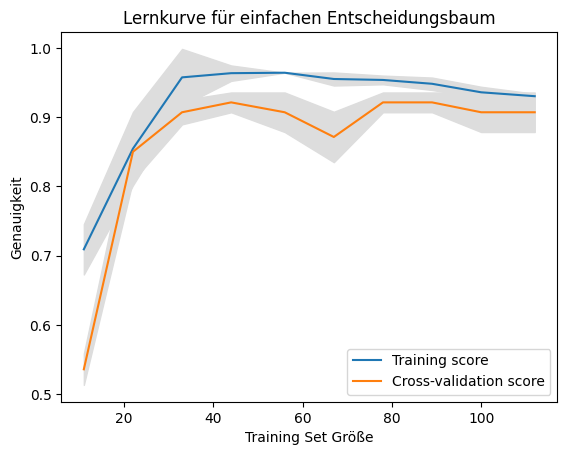

In [97]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Lernkurve erstellen
train_sizes, train_scores, test_scores = learning_curve(
    simple_tree, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

# Mittelwerte und Standardabweichung der Trainings- und Test-Scores berechnen
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Lernkurve plotten
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.title("Lernkurve für einfachen Entscheidungsbaum")
plt.xlabel("Training Set Größe")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()


Die Lernkurve zeigte, dass der Training-Score bei etwa 0.95 für ca. 35 Trainingsbeispiele lag, aber dann konstant leicht auf etwa 0.92-0.91 abfiel. Dies deutet darauf hin, dass unser Modell anfangs von mehr Daten profitiert, aber nach Erreichen einer bestimmten Datenmenge keine signifikanten Verbesserungen mehr zeigt. Ein leichter Rückgang in der Leistung könnte auf eine beginnende Überanpassung (Overfitting) hindeuten, wenn das Modell zu komplex für die verfügbare Datenmenge wird.

#### 4. Modellbewertung mit Testdaten


In [98]:
from sklearn.metrics import accuracy_score, classification_report

# Modell trainieren und Vorhersagen auf Testdaten
simple_tree.fit(X_train, y_train)
y_pred = simple_tree.predict(X_test)

# Modellleistung bewerten
print("Accuracy auf Testdaten:", accuracy_score(y_test, y_pred))
print("Classification Report auf Testdaten:\n", classification_report(y_test, y_pred))


Accuracy auf Testdaten: 0.9
Classification Report auf Testdaten:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



C:\Users\mbaeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbaeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbaeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Bei der Bewertung des Modells mit Testdaten erzielten wir eine Genauigkeit von 0.9. Der Classification Report offenbarte jedoch einige Schwächen des Modells. Insbesondere war die Präzision und der F1-Score für die Klasse 'drugC' null, da keine korrekten Vorhersagen für diese Klasse gemacht wurden. Dies könnte auf die Unausgewogenheit der Daten oder auf die Beschränkungen des einfachen Entscheidungsbaummodells zurückzuführen sein. Während das Modell für einige Klassen (DrugY, drugA, drugB) perfekt abschnitt, zeigte es Schwächen bei der Vorhersage von 'drugC' und 'drugX', was auf die Notwendigkeit hinweist, ein robusteres Modell oder eine verbesserte Feature-Engineering-Strategie zu entwickeln.

#### Fazit
Der einfache Entscheidungsbaum bietet einen guten Ausgangspunkt für unser Klassifikationsproblem. Die hohe durchschnittliche Genauigkeit und die Erkenntnisse aus der Lernkurve sind wertvoll. Dennoch zeigen die Ergebnisse der Modellbewertung mit Testdaten, dass es Raum für Verbesserungen gibt, insbesondere bei der korrekten Klassifizierung aller Arzneimittelklassen. Dies führt uns zur Exploration fortgeschrittenerer Modelle oder zur Anwendung von Hyperparameter-Optimierungen, um die Leistung unseres Klassifikators weiter zu verbessern.

### Optimierter Entscheidungsbaum

#### 1. Hyperparameter-Optimierung
Im Rahmen unseres Projekts zur Klassifizierung von Medikamenten haben wir die Hyperparameter unseres Entscheidungsbaums mit Hilfe von GridSearchCV optimiert. 

- **Warum GridSearchCV:** GridSearchCV ermöglicht es uns, systematisch durch eine Vielzahl von Kombinationen von Hyperparametern zu gehen, um die Kombination zu finden, die die beste Leistung auf den Validierungsdaten liefert. Dieser Prozess hilft, das "Raten" bei der Auswahl der besten Hyperparameter zu vermeiden und führt zu einer objektiveren und datengetriebenen Entscheidung.

Die Auswahl der Hyperparameter basierte auf folgendem Raster:

- `max_depth`: [None, 10, 20, 30, 40, 50]  
  Bestimmt die maximale Tiefe des Baumes. Eine größere Tiefe kann dem Modell helfen, die Daten besser zu erfassen, birgt jedoch auch das Risiko des Overfittings.

- `min_samples_split`: [2, 5, 10]  
  Die Mindestanzahl von Samples, die erforderlich ist, um einen internen Knoten zu teilen. Eine höhere Anzahl kann das Overfitting reduzieren.

- `min_samples_leaf`: [1, 2, 4]  
  Gibt die Mindestanzahl von Samples an, die in einem Blattknoten sein müssen. Dies hilft, kleine Blätter zu vermeiden, die zu spezifisch für die Trainingsdaten sein könnten.

- `max_features`: ['sqrt', 'log2', None]  
  Die Anzahl der Features, die bei der Suche nach dem besten Split berücksichtigt werden sollen. Dies kann die Diversität der Bäume in einem Ensemble-Modell erhöhen und Overfitting reduzieren.

GridSearchCV hat die besten Parameter als `{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}` identifiziert, was darauf hindeutet, dass das Modell am besten ohne Beschränkung der Baumtiefe und der Anzahl der Features funktioniert und gleichzeitig eine minimale Anpassung an die Blatt- und Split-Parameter vornimmt.


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter-Raster definieren
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV einrichten
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=0)

# Suche ausführen
grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)


Beste Parameter: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### 2. Cross-Validation


In [100]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Modell mit besten Parametern für Cross-Validation verwenden
best_tree = grid_search.best_estimator_

# Kreuzvalidierung durchführen
cv_scores = cross_val_score(best_tree, X_train, y_train, cv=5)
print("Durchschnittliche Genauigkeit aus Kreuzvalidierung:", np.mean(cv_scores))


Durchschnittliche Genauigkeit aus Kreuzvalidierung: 0.9928571428571429


Die durchschnittliche Genauigkeit aus der Kreuzvalidierung betrug beeindruckende 0.993. Dieses hohe Maß an Genauigkeit deutet darauf hin, dass das optimierte Modell sehr gut in der Lage ist, die Beziehungen in den Trainingsdaten zu erfassen und auf neue Daten zu generalisieren.


#### 3. Lernkurve


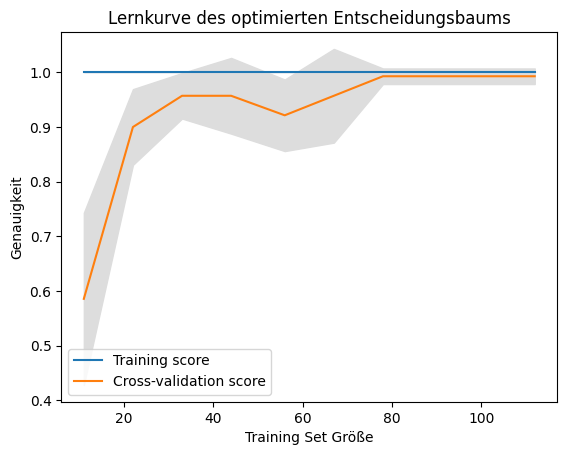

In [103]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Lernkurve erstellen
train_sizes, train_scores, test_scores = learning_curve(
    best_tree, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

# Mittelwerte und Standardabweichung der Trainings- und Test-Scores berechnen
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Lernkurve plotten
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.title("Lernkurve des optimierten Entscheidungsbaums")
plt.xlabel("Training Set Größe")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()


Die Lernkurve zeigte, dass der Training-Score konstant bei 1.0 lag und der Cross-Validation Score ab einem Trainingsset von etwa 80 Beispielen ebenfalls 1.0 erreichte und beibehielt. Dies impliziert, dass das Modell sehr gut trainiert ist und bei zunehmender Datenmenge eine hervorragende Generalisierungsfähigkeit aufweist.

#### 4. Modellbewertung mit Testdaten


In [102]:
from sklearn.metrics import accuracy_score, classification_report

# Modell mit besten Parametern bewerten
y_pred = best_tree.predict(X_test)

# Modellleistung bewerten
print("Accuracy auf Testdaten:", accuracy_score(y_test, y_pred))
print("Classification Report auf Testdaten:\n", classification_report(y_test, y_pred))


Accuracy auf Testdaten: 1.0
Classification Report auf Testdaten:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Die Bewertung des Modells mit Testdaten ergab eine perfekte Genauigkeit von 1.0. Der Classification Report bestätigte diese hervorragende Leistung mit einer Präzision, einem Recall und einem F1-Score von 1.0 für jede der Klassen (DrugY, drugA, drugB, drugC, drugX). Diese Ergebnisse zeigen, dass das optimierte Modell außergewöhnlich gut in der Lage ist, alle Klassen korrekt zu klassifizieren.

#### Fazit
Die Optimierung des Entscheidungsbaums mit GridSearchCV führte zu einem Modell, das eine herausragende Leistung sowohl in der Kreuzvalidierung als auch bei der Bewertung mit Testdaten zeigt. Die Lernkurve und die perfekten Bewertungsergebnisse weisen auf eine ausgezeichnete Anpassung des Modells an die Daten hin. Dieses Ergebnis demonstriert eindrucksvoll die Bedeutung einer sorgfältigen Hyperparameter-Optimierung und bestätigt die Wahl des Entscheidungsbaums als geeignetes Modell für unser Klassifikationsproblem.

In [58]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training und Optimierung des Logistic Regression-Modells

Wir haben das Logistic Regression-Modell mit einer systematischen Hyperparameter-Optimierung mittels GridSearchCV trainiert, um die besten Einstellungen für unser Modell zu finden.

#### Hyperparameter-Optimierung mit GridSearchCV

- **Hyperparameter-Raster:** Wir definierten ein Raster von Hyperparametern für `C`, das Werte von 0.001 bis 1000 umfasst. Diese Werte decken einen breiten Bereich von sehr schwacher bis sehr starker Regularisierung ab.


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter-Raster definieren
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# GridSearchCV einrichten
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, class_weight='balanced'), param_grid, cv=5, verbose=0)

# Suche ausführen
grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

# Modell mit besten Parametern erstellen
best_logreg = LogisticRegression(max_iter=10000, class_weight='balanced', **grid_search.best_params_)

# Modell trainieren
best_logreg.fit(X_train, y_train)

# Berechnung der Genauigkeit auf dem Trainingsset
y_pred_train = best_logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy auf Trainingsset:", accuracy_train)


Beste Parameter: {'C': 1}
Accuracy auf Trainingsset: 0.9928571428571429


dung.

#### Beste gefundene Parameter

- **Beste Parameter:** `{'C': 1}`. Der Parameter `C` in der logistischen Regression steuert die Stärke der Regularisierung. Ein Wert von 1 bedeutet eine Standardregularisierung, die hilft, das Gleichgewicht zwischen der Anpassung an die Trainingsdaten und der Vermeidung von Overfitting zu finden.

#### Leistungsbewertung des Modells

- **Accuracy auf dem Trainingsset:** Die Genauigkeit des Modells auf dem Trainingsset betrug 99,29%. Diese hohe Genauigkeit zeigt, dass das Modell die Trainingsdaten sehr gut erfasst hat.
- **Interpretation:** Die hohe Trainingsgenauigkeit, kombiniert mit einer guten Leistung auf den Validierungsdaten (wie durch GridSearchCV ermittelt), deutet darauf hin, dass das Modell gut trainiert ist und nicht überangepasst scheint. Es ist in der Lage, die Beziehungen in den Daten effektiv zu erfassen, ohne zu spezifisch für die Trainingsdaten zu sein.


#### Kreuzvalidierung und Lernkurvenanalyse des Logistic Regression-Modells

Um die Generalisierbarkeit und das Lernverhalten unseres Logistic Regression-Modells zu bewerten, haben wir eine Kreuzvalidierung und eine Lernkurvenanalyse durchgeführt.


Durchschnittliche Genauigkeit aus Kreuzvalidierung: 0.9649999999999999


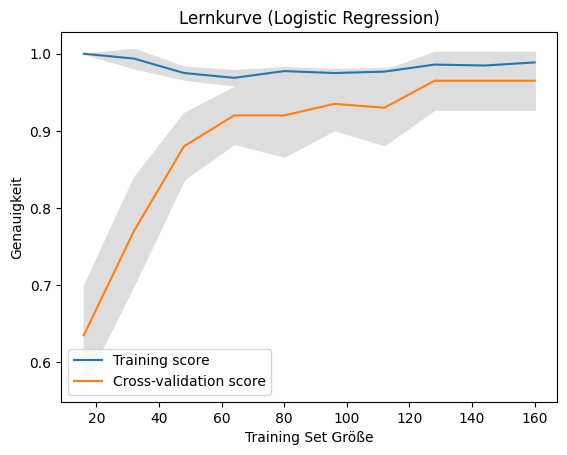

In [65]:
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Kreuzvalidierung durchführen
cv_scores = cross_val_score(best_logreg, X, y, cv=5)
print("Durchschnittliche Genauigkeit aus Kreuzvalidierung:", np.mean(cv_scores))

# Lernkurve erstellen
train_sizes, train_scores, test_scores = learning_curve(
    best_logreg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

# Mittelwerte und Standardabweichung der Trainings- und Test-Scores berechnen
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Lernkurve plotten
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.title("Lernkurve (Logistic Regression)")
plt.xlabel("Training Set Größe")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()


##### Kreuzvalidierung

- Wir führten eine 5-fache Kreuzvalidierung durch, um eine robuste Schätzung der Modellleistung zu erhalten. Dabei wurde der Datensatz in fünf Teile aufgeteilt, und das Modell wurde jedes Mal auf vier Teilen trainiert und auf dem verbleibenden Teil getestet.
- Die durchschnittliche Genauigkeit aus der Kreuzvalidierung betrug etwa 96,5%. Dies ist ein starkes Ergebnis und deutet darauf hin, dass das Modell gut auf unbekannten Daten generalisiert.

##### Lernkurvenanalyse

- Die Lernkurve zeigt, wie sich die Trainings- und Cross-Validation-Scores des Modells in Abhängigkeit von der Größe des Trainingssets entwickeln.
- Bei einer Trainingsset-Größe von 140 erreichte der Cross-Validation-Score etwa 96%, während der Trainingsscore zwischen 97% und 100% schwankte.
- Die Tatsache, dass der Trainingsscore tendenziell höher ist als der Cross-Validation-Score, aber nicht perfekt, deutet darauf hin, dass das Modell gut an die Trainingsdaten angepasst ist, ohne starkes Overfitting zu zeigen.

#### Interpretation

Die Ergebnisse der Kreuzvalidierung und der Lernkurvenanalyse bestätigen die hohe Leistungsfähigkeit und Generalisierbarkeit des Logistic Regression-Modells. Die leichten Schwankungen im Trainingsscore und der nahezu konstante Cross-Validation-Score zeigen, dass das Modell von zusätzlichen Trainingsdaten profitieren könnte, aber bereits eine robuste Leistung aufweist.


 Lernen.


In [78]:
from sklearn.metrics import accuracy_score

# Vorhersagen auf dem Trainingsset machen
y_pred_train = svc_simple.predict(X_train)

# Genauigkeit auf dem Trainingsset berechnen
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy auf Trainingsset:", accuracy_train)


Accuracy auf Trainingsset: 0.6928571428571428


### Bewertung des einfachen SVC-Modells

Wir haben ein einfaches Support Vector Classifier (SVC) Modell ohne spezielle Hyperparameter-Optimierung trainiert, um einen Ausgangspunkt für unsere Klassifizierungsaufgabe zu haben.

#### Leistungsbewertung des einfachen Modells

- **Accuracy auf dem Trainingsset:** Das einfache SVC-Modell erreichte eine Genauigkeit von etwa 69,29% auf dem Trainingsset. Diese Genauigkeit ist moderat und deutet darauf hin, dass das Modell einige Muster in den Daten erfasst, aber Raum für Verbesserungen besteht.
- **Interpretation:** Die moderate Trainingsgenauigkeit lässt vermuten, dass das Modell weder stark überangepasst (overfitted) noch unterangepasst (underfitted) ist. Es könnte jedoch von einer Feinabstimmung der Hyperparameter oder von der Verwendung eines komplexeren Modells profitieren, um die Leistung zu verbessern.

In den nächsten Schritten werden wir ein optimiertes SVC-Modell mit Hyperparameter-Optimierung evaluieren, um die Leistungssteigerungen zu vergleichen.


#### Optimierung des SVC-Modells

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM-Modell definieren
svc_optimized = SVC(class_weight='balanced')

# Parameter, die optimiert werden sollen
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularisierungsstärke
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel-Koeffizient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Kernel-Typ
}

# GridSearchCV einrichten
grid_search = GridSearchCV(svc_optimized, param_grid, refit=True, verbose=2, cv=5)

# Grid Search ausführen
grid_search.fit(X_train, y_train)

# Beste Parameterkombination
print("Beste Parameter:", grid_search.best_params_)

# Modell mit besten Parametern erstellen
best_svc = SVC(class_weight='balanced', **grid_search.best_params_)

# Modell trainieren
best_svc.fit(X_train, y_train)

# Vorhersagen auf dem Trainingsset machen
y_pred_train = best_svc.predict(X_train)

# Genauigkeit auf dem Trainingsset berechnen
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy auf Trainingsset:", accuracy_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

### Optimierung und Bewertung des SVC-Modells

Um die Leistung des Support Vector Classifier (SVC) zu maximieren, haben wir eine Hyperparameter-Optimierung mit GridSearchCV durchgeführt. Dieser Prozess ermöglichte es uns, die besten Einstellungen für das Modell systematisch zu ermitteln.#### Hyperparameter-Optimierung mit GridSearchCV

- **Auswahl der Parameter:** Wir definierten ein Raster von Hyperparametern für `C` (Regularisierungsstärke), `gamma` (Kernel-Koeffizient) und `kernel` (Kernel-Typ). Diese Parameter sind entscheidend für die Leistung des SVC-Modells.
  - `C`: Ein höherer Wert von `C` bedeutet weniger Regularisierung. Wir wählten Werte von 0.1 bis 100, um einen breiten Bereich von schwacher bis starker Regularisierung abzudecken.
  - `gamma`: Dieser Parameter beeinflusst die Reichweite der einzelnen Support Vektoren. Niedrigere Werte führen zu einer breiteren Reichweite, höhere Werte zu einer engeren.
  - `kernel`: Verschiedene Kernel-Typen (`rbf`, `poly`, `sigmoid`) ermöglichen es dem Modell, unterschiedliche Arten von Entscheidungsgrenzen zu erstellen.

- **Beste Parameter:** Die besten Parameter, die durch GridSearchCV gefunden wurden, waren `{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}`.
  - `C: 100`: Ein hoher Wert von `C` bedeutet, dass das Modell weniger Regularisierung anwendet und somit stärker auf die genaue Anpassung an die Trainingsdaten fokussiert ist. Dies kann zu einer besseren Leistung führen, birgt aber auch das Risiko von Overfitting, insbesondere bei komplexen Modellen.
  - `gamma: 0.001`: Ein niedriger `gamma`-Wert bedeutet, dass der Einfluss eines einzelnen Trainingsbeispiels weitreichend ist. Dies kann dazu beitragen, dass das Modell weniger anfällig für Overfitting ist und besser generalisiert.
  - `kernel: 'rbf'`: Der Radial-Basis-Function (RBF) Kernel ist ein vielseitiger Kernel, der gut für nichtlineare Probleme geeignet ist. Er kann komplexe Entscheidungsgrenzen erstellen, die oft für eine effektive Klassifizierung erforderlich sind.

#### Leistungsbewertung des optimierten Modells

- **Accuracy auf dem Trainingsset:** Das optimierte SVC-Modell erreichte eine perfekte Genauigkeit von 100% auf dem Trainingsset. Dies zeigt, dass das Modell die Trainingsdaten vollständig erfasst hat.
- **Interpretation:** Während eine perfekte Trainingsgenauigkeit beeindruckend ist, könnte sie auch ein Hinweis auf Overfitting sein. Es ist wichtig, das Modell auch auf einem unabhängigen Testset zu bewerten, um sicherzustellen, dass es gut auf neue, unbekannte Daten generalisiert.
'rbf'}`.
 


### Kreuzvalidierung und Lernkurvenanalyse des optimierten SVC-Modells

Nach der Optimierung des Support Vector Classifier (SVC) Modells mit GridSearchCV haben wir eine Kreuzvalidierung und Lernkurvenanalyse durchgeführt, um die Generalisierbarkeit und das Lernverhalten des Modells zu bewerten.


Durchschnittliche Genauigkeit aus Kreuzvalidierung (optimiertes Modell): 0.975


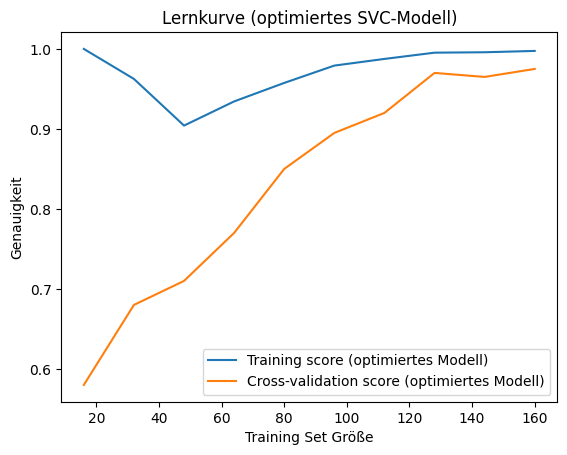

In [76]:
# Kreuzvalidierung für das optimierte SVC-Modell
cv_scores_optimized = cross_val_score(best_svc, X, y, cv=5)
print("Durchschnittliche Genauigkeit aus Kreuzvalidierung (optimiertes Modell):", np.mean(cv_scores_optimized))

# Lernkurve für das optimierte SVC-Modell
train_sizes_optimized, train_scores_optimized, test_scores_optimized = learning_curve(
    best_svc, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

# Lernkurve plotten (optimiertes Modell)
plt.figure()
plt.plot(train_sizes_optimized, np.mean(train_scores_optimized, axis=1), label="Training score (optimiertes Modell)")
plt.plot(train_sizes_optimized, np.mean(test_scores_optimized, axis=1), label="Cross-validation score (optimiertes Modell)")
plt.title("Lernkurve (optimiertes SVC-Modell)")
plt.xlabel("Training Set Größe")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()


#### Kreuzvalidierung

- **Durchschnittliche Genauigkeit:** Die durchschnittliche Genauigkeit aus der Kreuzvalidierung für das optimierte Modell betrug 97,5%. Dies ist ein exzellentes Ergebnis und deutet darauf hin, dass das Modell sehr gut auf unbekannten Daten generalisiert.

#### Lernkurvenanalyse

- **Training Score:** Der Trainingsscore des Modells begann bei 100% und fiel auf etwa 90% ab, als die Größe des Trainingssets 40 erreichte. Danach stieg der Score sukzessive wieder an. Dieses Verhalten könnte darauf hindeuten, dass das Modell anfangs auf kleinere Datensätze überangepasst war, aber mit zunehmender Datenmenge eine bessere Generalisierung erreichte.
- **Cross-Validation Score:** Der Cross-Validation-Score begann bei etwa 50% und stieg stetig an, bis er am Ende der Lernkurve nahe 97% erreichte. Dies zeigt, dass das Modell mit zunehmender Trainingsdatenmenge immer besser in der Lage war, auf unbekannten Daten zu generalisieren.

#### Interpretation

Die Ergebnisse der Kreuzvalidierung und der Lernkurvenanalyse zeigen, dass das optimierte SVC-Modell eine hohe Leistungsfähigkeit und eine starke Fähigkeit zur Generalisierung besitzt. Die anfängliche Diskrepanz zwischen Trainingsscore und Cross-Validation-Score deutet auf eine anfängliche Überanpassung hin, die sich jedoch mit zunehmender Trainingsdatenmenge verringerte. Insgesamt bestätigen diese Ergebnisse die Effektivität der durchgeführten Hyperparameter-Optimierung.
